# preprocessing 

### 1 Load Data

Read data from the source 

### 2 Check for data types, missing values, duplicates, and overall structure.
Handle Missing Values


### 3 Normalize or standardize data if necessary.
Encode categorical variables.
Create new features if needed.

### 4 Manage Data Relationships

### 5 Save Cleaned Data
Export the cleaned data to a new file or database.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers ,losses
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [6]:
data=pd.read_csv('student_version.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
729,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0
730,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0
731,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
732,60,M,ASY,152,0,0,ST,118,Y,0.0,Up,0


In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 
> - From the previous cell that no data messing

In [8]:
data.duplicated().sum()

0

> - No Duplication 

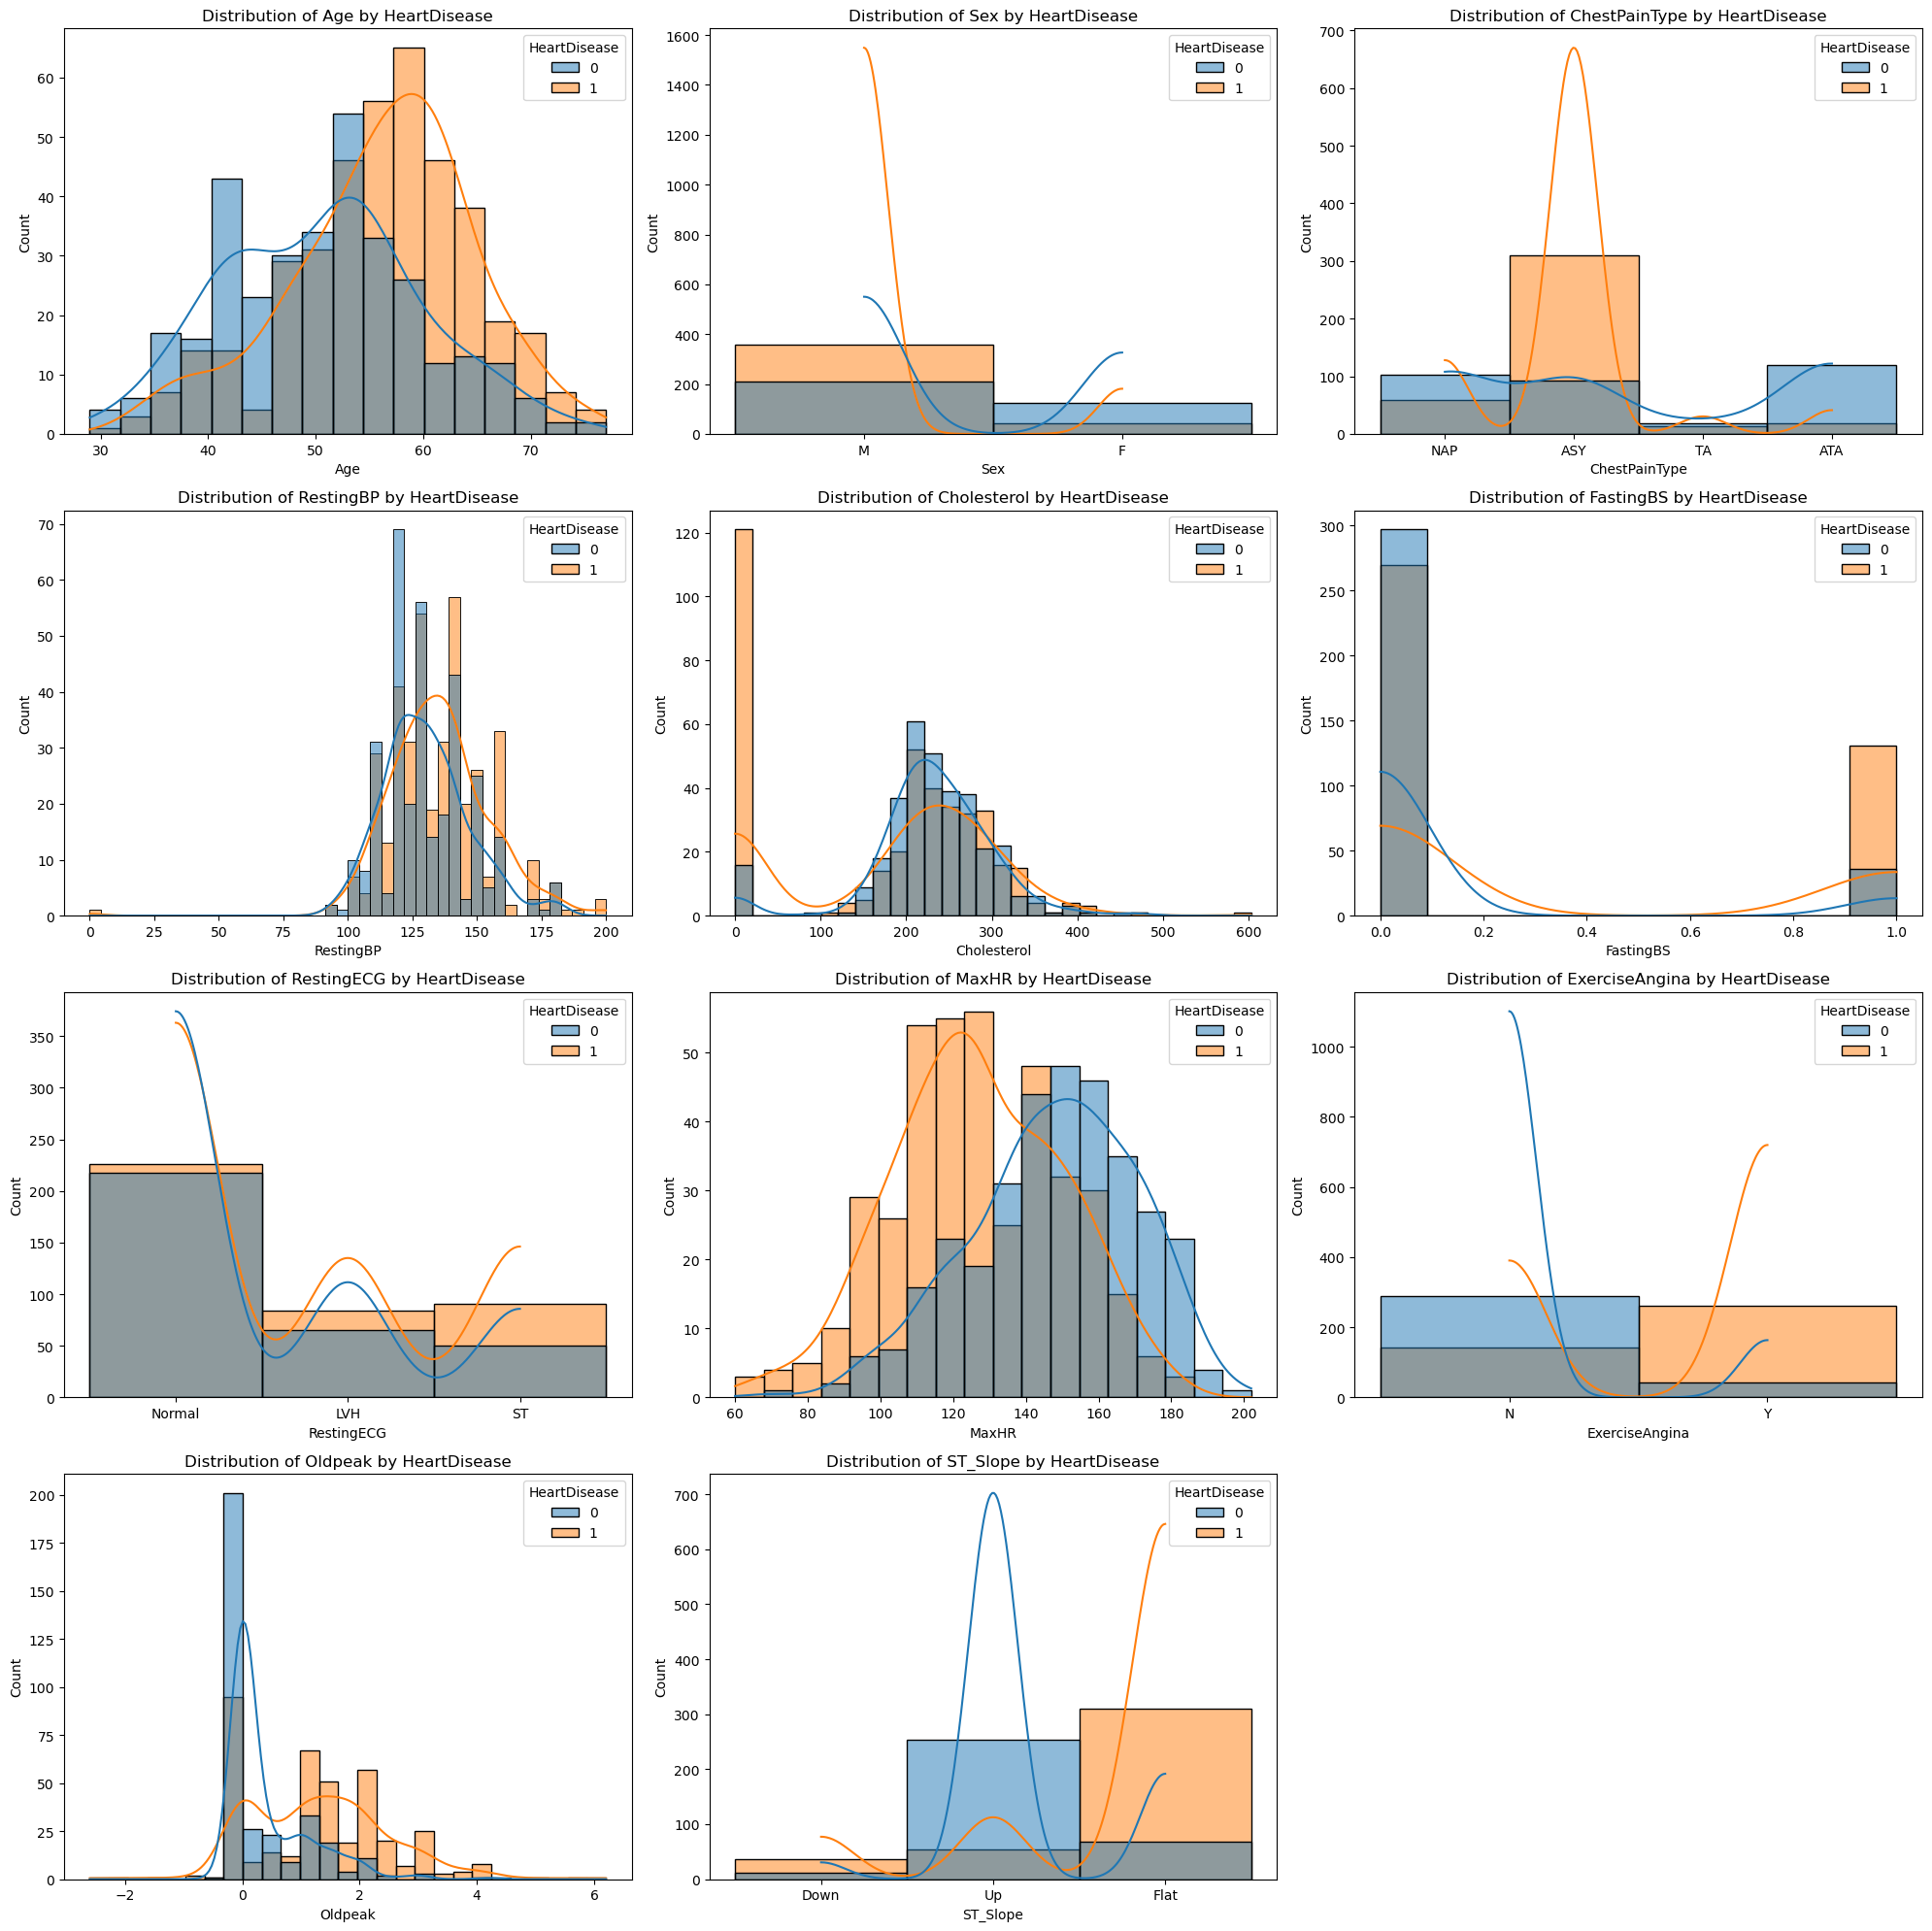

In [9]:
features = data.columns[:-1]

# Define the number of rows and columns for the subplots grid
n_rows = 4
n_cols = 3

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a histogram plot
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue='HeartDisease', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by HeartDisease')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='ST_Slope', ylabel='Count'>

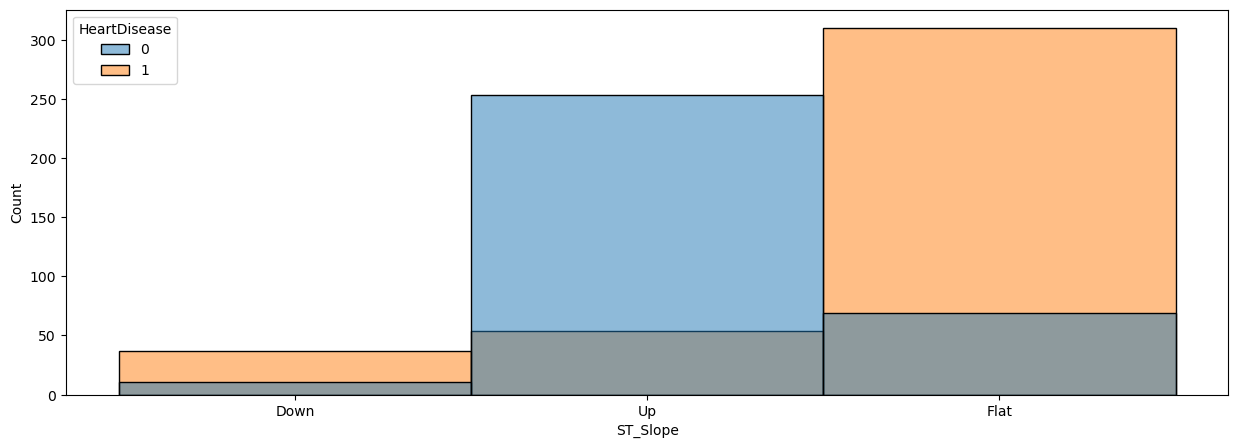

In [10]:
plt.figure(figsize=(15, 5))
sns.histplot(data=data, x='ST_Slope', hue='HeartDisease')

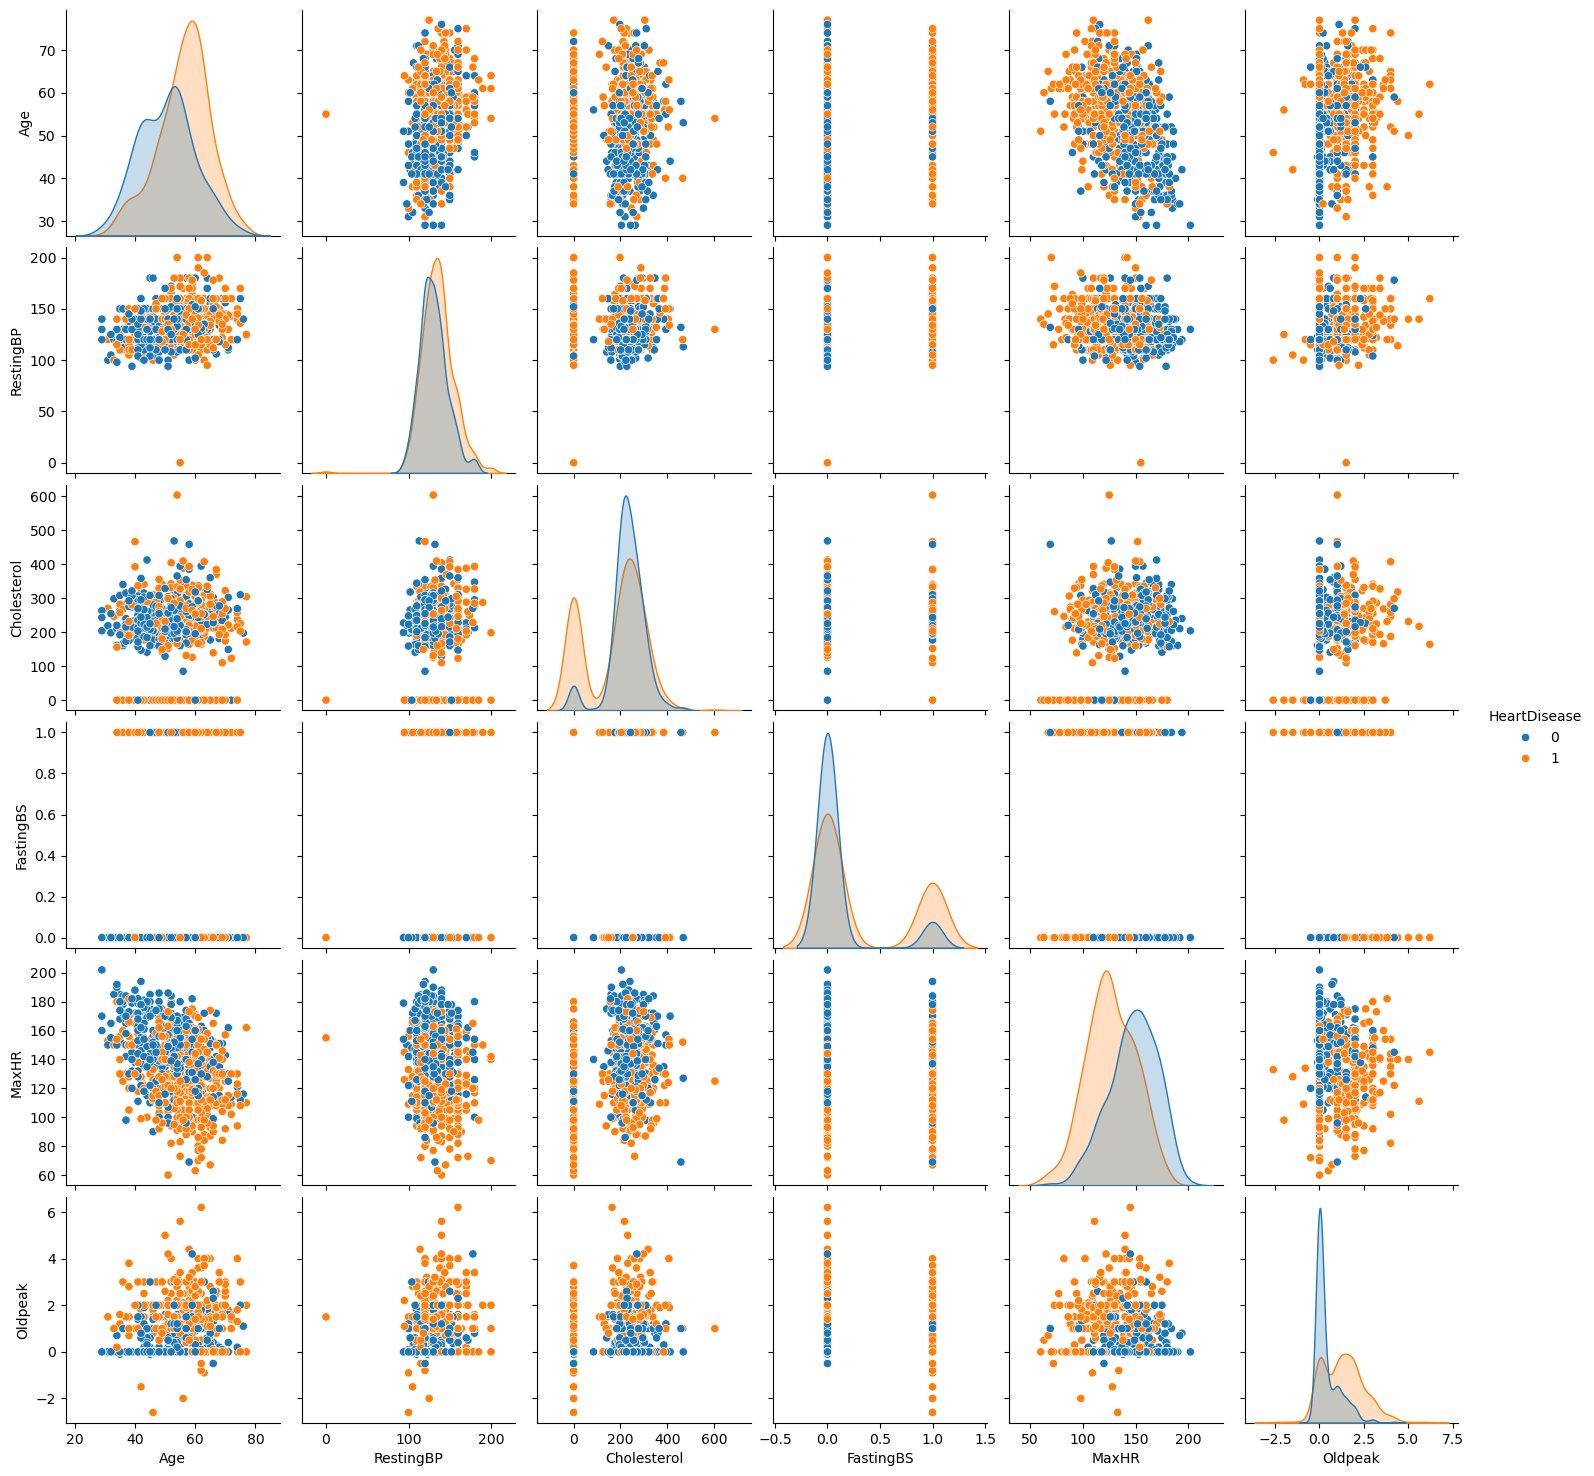

In [11]:
sns.pairplot(data=data,hue='HeartDisease')

In [12]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [13]:


# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numerical data
numerical_transformer =Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestClassifier(random_state=42)



from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [14]:
# # Preprocessing of validation data, get predictions
predicted_val=my_pipeline.predict(X_val)
metric = accuracy_score(y_val, predicted_val)
print('Accuracy:', metric)
conf_matrix = confusion_matrix(y_val, predicted_val)
conf_matrix

Accuracy: 0.891156462585034


array([[52, 12],
       [ 4, 79]], dtype=int64)

In [15]:
predicted_test=my_pipeline.predict(X_test)
metric = accuracy_score(y_test, predicted_test)
print('Accuracy:', metric)
conf_matrix = confusion_matrix(y_test, predicted_test)
conf_matrix

Accuracy: 0.8843537414965986


array([[56, 10],
       [ 7, 74]], dtype=int64)

In [16]:


# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numerical data
numerical_transformer =Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = LogisticRegression(random_state=42)


from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('model', LogisticRegression(random_state=42))])

In [17]:
# # Preprocessing of validation data, get predictions
predicted_val=my_pipeline.predict(X_val)
metric = accuracy_score(y_val, predicted_val)
print('Accuracy:', metric)
conf_matrix = confusion_matrix(y_val, predicted_val)
conf_matrix

Accuracy: 0.8571428571428571


array([[53, 11],
       [10, 73]], dtype=int64)

In [18]:
predicted_test=my_pipeline.predict(X_test)
metric = accuracy_score(y_test, predicted_test)
print('Accuracy:', metric)
conf_matrix = confusion_matrix(predicted_test,y_test)
conf_matrix

Accuracy: 0.891156462585034


array([[55,  5],
       [11, 76]], dtype=int64)

In [63]:
accuracy = model.evaluate( preprocessor.transform(X_test), y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.8503


In [140]:
accuracy = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8707


In [18]:


# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numerical data
numerical_transformer =Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='constant')),
('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = KNeighborsClassifier(n_neighbors=2)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

In [19]:
knn_pred = my_pipeline.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_pred)
conf_matrix = confusion_matrix(y_val, knn_pred)
print("KNN Confusion Matrix:\n", conf_matrix)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_val, knn_pred))
print("KNN ROC-AUC Score:", roc_auc_score(y_val, knn_pred))


KNN Confusion Matrix:
 [[55  9]
 [17 66]]
KNN Accuracy: 0.8231292517006803
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        64
           1       0.88      0.80      0.84        83

    accuracy                           0.82       147
   macro avg       0.82      0.83      0.82       147
weighted avg       0.83      0.82      0.82       147

KNN ROC-AUC Score: 0.8272778614457832


d:\anaconda\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\anaconda\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [20]:
knn_pred = my_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
print("KNN Confusion Matrix:\n", conf_matrix)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
print("KNN ROC-AUC Score:", roc_auc_score(y_test, knn_pred))

KNN Confusion Matrix:
 [[54 12]
 [16 65]]
KNN Accuracy: 0.8095238095238095
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        66
           1       0.84      0.80      0.82        81

    accuracy                           0.81       147
   macro avg       0.81      0.81      0.81       147
weighted avg       0.81      0.81      0.81       147

KNN ROC-AUC Score: 0.8103254769921436


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of features to encode
features = ['ChestPainType', 'Sex', 'RestingECG','ExerciseAngina','ST_Slope']

# Apply LabelEncoder to each feature
for feature in features:
    data[feature] = le.fit_transform(data[feature])

# Display the transformed data
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,1,2,120,240,1,1,194,0,0.8,0,0
1,36,1,2,130,209,0,1,178,0,0.0,2,0
2,56,1,0,150,213,1,1,125,1,1.0,1,1
3,37,0,2,130,211,0,1,142,0,0.0,2,0
4,51,1,0,120,0,1,1,104,0,0.0,1,1


In [22]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



In [23]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)
X_val = st.transform(X_val)

model = Sequential()
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6050 - accuracy: 0.6409
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8159
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8409
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8455
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8568
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8568
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8659
Epoch 8/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8659
Epoch 9/100
88/88 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8727
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8750
Epoch 11/

In [26]:

_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))


5/5 [==============================] - 0s 1ms/step - loss: 0.7959 - accuracy: 0.8776
Accuracy: 87.76


In [27]:

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


5/5 [==============================] - 0s 1ms/step - loss: 0.8140 - accuracy: 0.8639
Accuracy: 86.39
